Cristina Cicali, Clelia Corridori, Anna Steffinlongo

# OTOC computation for different values of the kicking strength K 


In [1]:
#Call of all the libries need
from numpy import *
import math
import matplotlib.pyplot as plt
from OTOCfunc import *


In [2]:
#Parameters to compute the Out-Of-Time-Correlator OTOC. 
#N are the number of steps chosen for the computation. 
# T is the period of the kicks which is proportional to heff 
# K are the different values of the kicking strength
# Nkicks is the number of kicks.
# To reduce the oscillation of the OTOC for small values of K we have introduced a mean over a number of trials
#chosen in input with the variable "trials"

N=2**14 
T=2**-7
K=[0.5,2,3,4,6,10]
Nkicks=100
trials=30

#Computation of the mean of the OTOC over the number of trials with the function mean_otoc contained in the 
#python file OTOC func.
mean_C=mean_otoc(N,T,K,Nkicks,trials,True)

#Vector for the number of kicks
Kick=arange(1,Nkicks+1,1)

Trial # 0
Trial # 1
Trial # 2
Trial # 3
Trial # 4
Trial # 5
Trial # 6
Trial # 7
Trial # 8
Trial # 9
Trial # 10
Trial # 11
Trial # 12
Trial # 13
Trial # 14
Trial # 15
Trial # 16
Trial # 17
Trial # 18
Trial # 19
Trial # 20
Trial # 21
Trial # 22
Trial # 23
Trial # 24
Trial # 25
Trial # 26
Trial # 27
Trial # 28
Trial # 29


In [3]:
#Due to the time needed for the computation of the OTOC we saved the data in a txt file in order to only load
#the file when needed
saveF=True
if saveF==True:
    with open('OTOC-30trials-mean-FigOTOC.txt', 'w') as out:
        for line in mean_C:
            savetxt(out, line)


In [4]:
# #   DECOMMENT to load data from a txt file 
# load=False
# if load==True:
#     # The value selected here must be the same of the quantities above chosen for the saved file!
#     N=2**14
#     T=2**-7
#     K=[0.5,2,3,4,6,10]
#     Nkicks=100
#     trials=1
#     Kick=arange(1,Nkicks+1,1)

#     data = loadtxt("OTOC-T7-N14-1t.txt", comments="#", delimiter="\n", unpack=False)
#     mean_C=reshape(data.astype(float),(Nkicks,len(K)))

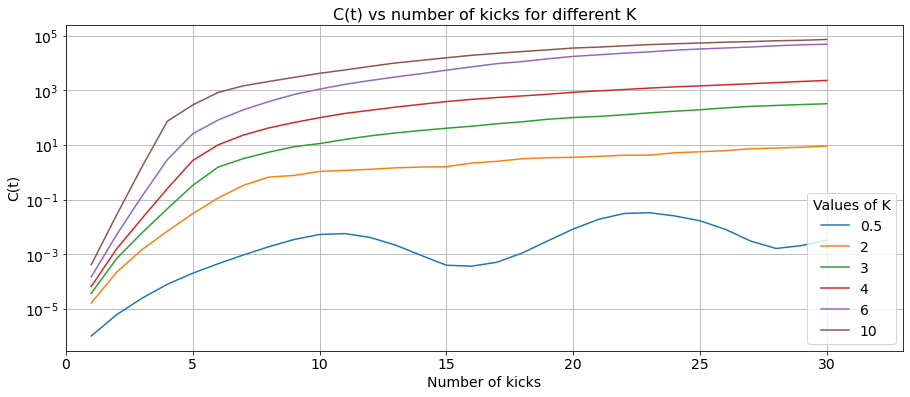

In [5]:
#Plot of the OTOC as function of the number of kicks, and also for different values of the kicking strength.
#We have chosen to reproduce the same plot of the article "Lyapunov Exponent and Out-of-Time-Ordered Correlator’s Growth Rate in a Chaotic System"
# plotting different OTOC from 1 to 30 Kicks and setting the scale  along y as 'log' scale

plt.figure(figsize=(15, 6))
plt.yscale('log')

for ii in range(len(K)):
    plt.plot(Kick[:30],mean_C[:30,ii]) 
label=K

plt.legend(label, loc='lower right',title='Values of K', fontsize='14',title_fontsize=14)
plt.xlim([0,33])
plt.xlabel('Number of kicks', size=14)
plt.ylabel('C(t)', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title('C(t) vs number of kicks for different K', size=16)
plt.grid()
plt.savefig('OTOC.png', dpi=100)



In [6]:
#Computation of the logarithm (variable log_C) of the OTOC. First we initialize the variable log_C and then 
#we computed the values for each value of the kick, that can be seen as a sort of time, and also for different 
#values of the the kicking strength.

log_C=zeros([Nkicks,len(K)])

#The log_C is computed as the natural logarithm of the OTOC normalized to its first value divided
#by the the time multipled by two.
for jj in range(1,Nkicks):
    log_C[jj,:]=log(mean_C[jj,:]/mean_C[0,:])/(2*jj)

# Computation of the asymptotic behaviour of this values which is proportional to t^-1 as reportated in the Fig 3
# of the article previous cited.
def asymp(Kick):
    return((1/Kick[1:])*11)

funz_t=asymp(Kick)


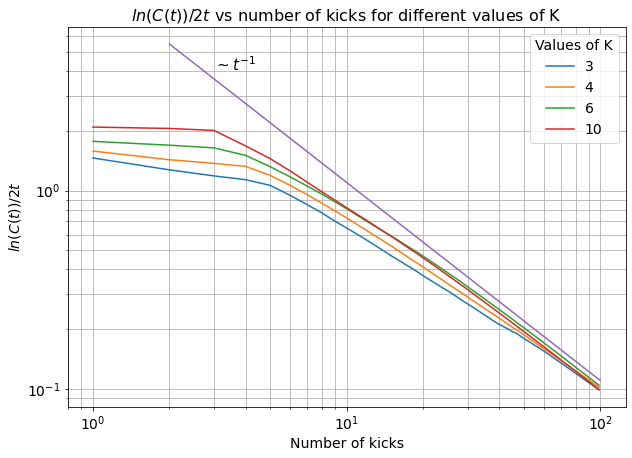

In [7]:
#Plot of log_C Vs the time for different values of K and of with purple line the asymptotic value. This function 
#is plotted setting the log scale both on x and y axis in order to obeserve a constant behaviour for the expotial growth
#of the OTOC and a linear time behaviour where the OTOC has a power-low growth with a decreasing power.

plt.figure(figsize=(10,7))
plt.xscale('log')
plt.yscale('log')
for kk in range(2,len(K)):
    plt.plot(arange(1,Nkicks),log_C[1:,kk]) 
label=K[2:]

plt.plot(Kick[1:],funz_t[:]) #Plot of the asymptotic value.

plt.text(3, 4, "$\sim t^{-1}$", fontsize=15)
plt.legend(label, loc='upper right', title='Values of K', title_fontsize=14, fontsize=14)
plt.xlabel('Number of kicks', size=14)
plt.ylabel('$ln (C(t)) /2t$', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title('$ln (C(t)) /2t$ vs number of kicks for different values of K', size=16)
plt.savefig('OTOClog-log-K.png', dpi=100)
plt.grid(True, which="both")